In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [7]:
db = pd.read_csv("Salary.csv")


In [8]:
db.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
db.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [12]:
X = db["YearsExperience"].values
Y = db["Salary"].values


In [13]:
db.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [14]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5, 11.2, 11.5, 12.3,
       12.9, 13.5])

In [15]:
Y


array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

In [19]:
db = db.sample(frac=1,random_state=42).reset_index(drop=True)

In [21]:
split_index = int(0.7*len(db))
train_data = db[:split_index]
test_data =  db[split_index:]

In [22]:
X_train = train_data["YearsExperience"].values
Y_train = train_data["Salary"].values

X_test = test_data["YearsExperience"].values
Y_test = test_data["Salary"].values

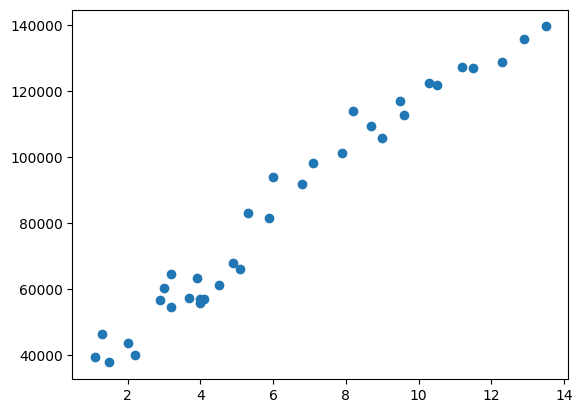

In [23]:
plt.scatter(X,Y)

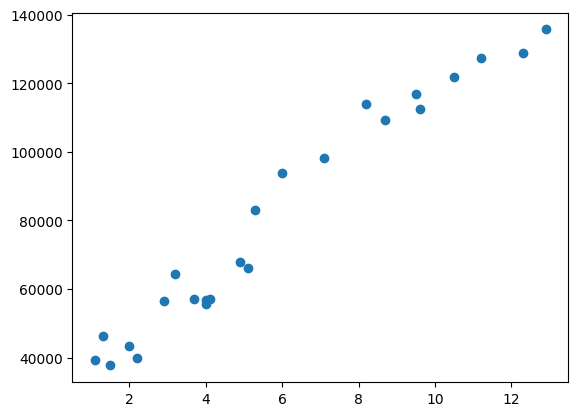

In [24]:
plt.scatter(X_train,Y_train)

In [ ]:
m = 0
b = 0
alpha = 0.00001
it = 100000
n = len(X_train)

for it in range(it):
    y_pred = m* X_train + b
    error = Y_train - y_pred


    dm = (-2/n)*sum(X_train* error)
    db = (-2/n)*sum(error)


    m = m - alpha*dm
    b = b - alpha*db

    if it % 100 == 0:
        mse = (error**2).mean()
        print(f"Epoch{it},MSE: {mse},m:{m},b:{b}")

Epoch0,MSE: 7523132433.541667,m:11.74250591666667,b:1.6088125000000002
Epoch100,MSE: 6244847715.251961,m:1130.5580072514426,b:155.56680474247352
Epoch200,MSE: 5190641181.97429,m:2146.4127766632423,b:296.6656200508715
Epoch300,MSE: 4321226706.6889515,m:3068.767237547958,b:426.0861156341757
Epoch400,MSE: 3604205942.3260384,m:3906.2125614205374,b:544.9006483909168
Epoch500,MSE: 3012860732.3056183,m:4666.550537362874,b:654.0830442401711
Epoch600,MSE: 2525157239.848536,m:5356.86610282931,b:754.5176514407825
Epoch700,MSE: 2122924676.789029,m:5983.593210106043,b:847.0075620646902
Epoch800,MSE: 1791178020.4991515,m:6552.5746407643455,b:932.2820780568346
Epoch900,MSE: 1517559474.43007,m:7069.1163241839495,b:1011.003491291279
Epoch1000,MSE: 1291877853.7276516,m:7538.036665128955,b:1083.773240655611
Epoch1100,MSE: 1105728727.3587954,m:7963.711338959411,b:1151.1375034041168
Epoch1200,MSE: 952181158.2371393,m:8350.113970925566,b:1213.5922727608017
Epoch1300,MSE: 825519365.1559187,m:8700.85307772766

: 

In [ ]:
def r2_score(y_true,y_pred):
    mean_y = sum(y_true)/len(y_true)
    ss_total = sum((y - mean_y)**2 for y in y_true)
    ss_res = sum((y_t - y_p) ** 2 for y_t, y_p in zip(y_true, y_pred))
    r2 = 1 - (ss_res / ss_total)
    return r2